# Import Dependencies

In [197]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualization code visuals.py from project root folder
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Reading Data 

In [198]:
#Reading data
data = pd.read_csv("summer.csv")

# Manipulating Data 

In [199]:
#Selecting only the data of india
data = data[data.Country == "IND"]
#dataset = dataset.set_index("Sport")
#dataset = dataset.drop("Hockey", axis=0)
data.drop('Athlete', axis=1, inplace=True)
data.drop_duplicates(inplace=True)

# Statistical Analysis


In [200]:
#Total number of wins
n_sport = data.shape[0]

#Percentage of wins of each sport over total wins
n_hockey = len(data[data.Sport == "Hockey"])
n_hockey = (n_hockey)/(n_sport) * 100
n_boxing = len(data[data.Sport == "Boxing"])
n_boxing = (n_boxing)/(n_sport) * 100
n_badminton = len(data[data.Sport == "Badminton"])
n_badminton = (n_badminton)/(n_sport) * 100
n_athletics = len(data[data.Sport == "Athletics"])
n_athletics = (n_athletics)/(n_sport) * 100
n_wrestling = len(data[data.Sport == "Wrestling"])
n_wrestling = (n_wrestling)/(n_sport) * 100
n_weightlifting = len(data[data.Sport == "Weightlifting"])
n_weightlifting = (n_weightlifting)/(n_sport) * 100
n_tennis = len(data[data.Sport == "Tennis"])
n_tennis = (n_tennis)/(n_sport) * 100
n_shooting = len(data[data.Sport == "Shooting"])
n_shooting = (n_shooting)/(n_sport) * 100

print ("Percentage Of Hockey Medals :{:.2f}%".format(n_hockey))
print ("Percentage Of Boxing Medals :{:.2f}%".format(n_boxing))
print ("Percentage Of Badminton Medals :{:.2f}%".format(n_badminton))
print ("Percentage Of Athletics Medals :{:.2f}%".format(n_athletics))
print ("Percentage Of Wrestling Medals :{:.2f}%".format(n_wrestling))
print ("Percentage Of Weightlifting Medals :{:.2f}%".format(n_weightlifting))
print ("Percentage Of Tennis Medals :{:.2f}%".format(n_tennis))
print ("Percentage Of Shooting Medals :{:.2f}%".format(n_shooting))

Percentage Of Hockey Medals :42.31%
Percentage Of Boxing Medals :7.69%
Percentage Of Badminton Medals :3.85%
Percentage Of Athletics Medals :7.69%
Percentage Of Wrestling Medals :15.38%
Percentage Of Weightlifting Medals :3.85%
Percentage Of Tennis Medals :3.85%
Percentage Of Shooting Medals :15.38%


# Visualizing the Data

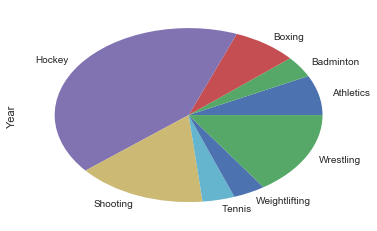

In [201]:
graph_dataset = data.groupby('Sport')['Year'].sum()
graph_dataset.plot(kind='pie')

# Adding Classifiers

In [202]:
# Add a column of Winrate by checking the sport in each row and setting its percentage.
def calculate_winrate(row):
    if(row['Sport']) == 'Athletics':
        return n_athletics
    if(row['Sport']) == 'Hockey':
        return n_hockey
    if(row['Sport']) == 'Boxing':
        return n_boxing
    if(row['Sport']) == 'Badminton':
        return n_badminton
    if(row['Sport']) == 'Wrestling':
        return n_wrestling
    if(row['Sport']) == 'Weightlifting':
        return n_weightlifting
    if(row['Sport']) == 'Tennis':
        return n_tennis
    if(row['Sport']) == 'Shooting':
        return n_shooting
    
    
data['WinRate'] = data.apply(lambda row: calculate_winrate(row), axis=1)

# 0 = low probability, 1 = some probability, 2 = High probability
def get_probability(row):
    if(0< row['WinRate'] <40):
        return 0
    if(41<row['WinRate']<70):
        return 1
    if(71<row['WinRate']<100):
        return 2

#Assigning the Probability values by checking the sport name and its percentage over total wins
data['Probability'] = data.apply(lambda row: get_probability(row),axis=1)
data.drop(['Discipline','City','Country','Gender','Event', 'Medal'], axis=1, inplace=True)
data

,Year,Sport,WinRate,Probability
241,1900,Athletics,7.692308,0
244,1900,Athletics,7.692308,0
5512,1928,Hockey,42.307692,1
6122,1932,Hockey,42.307692,1
6962,1936,Hockey,42.307692,1
7787,1948,Hockey,42.307692,1
8658,1952,Hockey,42.307692,1
8865,1952,Wrestling,15.384615,0
9547,1956,Hockey,42.307692,1
10451,1960,Hockey,42.307692,1


# Splitting the Data

In [203]:
#Splitting into feature and target label
Probability = data['Probability']
features = data.drop(['Probability', 'Sport'],axis=1)

# Import train_test_split
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, 
 Probability, 
 test_size = 0.2, 
 random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 20 samples.
Testing set has 6 samples.


# Training, Predicting and Evaluating

In [204]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict_evaluate(learner, sample_size, X_train, Y_train, X_test, Y_test):
    
    results = {}
    
    start = time()
    learner = learner.fit(X_train[:sample_size], Y_train[:sample_size])
    end = time()
    
    results['Train Time'] = end - start
    
    start = time()
    prediction_train = learner.predict(X_train[:20])
    prediction_test = learner.predict(X_test)
    
    end = time()
    
    results['pred_time'] = end - start
    results['acc_train'] = accuracy_score(Y_train[:20],prediction_train)
    results['acc_test'] = accuracy_score(Y_test, prediction_test)
    results['f_train'] = fbeta_score(Y_train[:20], prediction_train, beta=0.5, average='micro')
    results['f_test'] = fbeta_score(Y_test, prediction_test, beta = 0.5, average= 'micro')
    print ("{} trained on {} samples".format(learner.__class__.__name__, sample_size))
    
    return results


In [206]:
# Import any three supervised learning classification models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Initialize the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_C = RandomForestClassifier(max_depth=None, random_state=None)
# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(Y_train)
samples_10 = int(len(Y_train)*10/100)
samples_1 = int(len(Y_train)*1/100)
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    #for i, samples in enumerate([samples_1, samples_10, samples_100]):
    results[clf_name][samples_100] = \
    train_predict_evaluate(clf, samples_100, X_train, Y_train, X_test, Y_test)
#     print(results)
# Run metrics visualization for the three supervised learning models chosen
#vs.visualize_classification_performance(results)

GaussianNB trained on 20 samples
DecisionTreeClassifier trained on 20 samples
RandomForestClassifier trained on 20 samples


In [218]:
# Import a supervised learning model that has 'feature_importances_'
model = RandomForestClassifier(max_depth=None, random_state=None)
# Train the supervised model on the training set using .fit(X_train, y_train)
model = model.fit(X_train, Y_train)
# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(X_train.columns)
print(importances)

Index(['Year', 'WinRate'], dtype='object')
[0.22891738 0.77108262]


# Tuning our Model and comparing the accuracy and f-score

In [228]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = RandomForestClassifier(max_depth=None, random_state=None)

# Create the parameters or base_estimators list you wish to tune, using a dictionary if needed.
# Example: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

"""
n_estimators: Number of trees in the forest
max_features: The number of features to consider when looking for the best split
max_depth: The maximum depth of the tree
"""
parameters = {'n_estimators': [1, 2], 'max_features':[1,2], 'max_depth': [1,2]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5, average="micro")

# TODO: Perform grid search on the claszsifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, Y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(Y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(Y_test, predictions, beta = 0.5, average="micro")))
print("\nOptimized Model\n------")
print(best_clf)
print("\nFinal accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test, best_predictions, beta = 0.5,  average="micro")))

Unoptimized model
------
Accuracy score on testing data: 1.0000
F-score on testing data: 1.0000

Optimized Model
------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000


# DONE